In [2]:
# to install package if package does not exit
!pip install plotly
!pip install seaborn
!pip install matplotlib

In [3]:
# import relevant packages for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
%matplotlib inline

# Understanding and cleaning of Datasources

In [4]:
# reading the 3 data files
malaira_age_df = pd.read_csv('malaria_deaths_age.csv')
malaria_death_df = pd.read_csv('malaria_deaths.csv')
malaria_inc_df = pd.read_csv('malaria_inc.csv')

In [5]:
# taking a view of malaria age dataframe and removing the Unamed: 0 column
malaira_age_df = malaira_age_df.iloc[:,1:]
malaira_age_df.head(5)

,entity,code,year,age_group,deaths
0,Afghanistan,AFG,1990,Under 5,184.606435
1,Afghanistan,AFG,1991,Under 5,191.658193
2,Afghanistan,AFG,1992,Under 5,197.140197
3,Afghanistan,AFG,1993,Under 5,207.357753
4,Afghanistan,AFG,1994,Under 5,226.209363


In [6]:
# understanding the data types of malaria age dataframe
# Note that there are 4320 data missing for code column
malaira_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30780 entries, 0 to 30779
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entity     30780 non-null  object 
 1   code       26460 non-null  object 
 2   year       30780 non-null  int64  
 3   age_group  30780 non-null  object 
 4   deaths     30780 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
# it seems that the mising 32 country code is insignificant to clean for the analysis
malaira_age_df[malaira_age_df['code'].isna()]
malaira_age_df[malaira_age_df['code'].isna()]['entity'].nunique()

32

In [8]:
# taking a view of malaria death dataframe
malaria_death_df.head(5)

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [9]:
# there is a need to rename the death column as it quite lengthy
malaria_death_df = malaria_death_df.rename(columns = {'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)': 'Malaria Deaths per 100k ppl'})

In [10]:
# understanding the data types of malaria age dataframe
# Note that there are 864 data missing for the code column
malaria_death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       6156 non-null   object 
 1   Code                         5292 non-null   object 
 2   Year                         6156 non-null   int64  
 3   Malaria Deaths per 100k ppl  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


In [11]:
# it seems that it is mising the same 32 country code just like the malaria age dataframe. It is insignificant to clean for the analysis
malaria_death_df[malaria_death_df['Code'].isna()]
malaria_death_df[malaria_death_df['Code'].isna()]['Entity'].nunique()

32

In [12]:
# taking a look at the malaria gen dataframe
malaria_inc_df.head(5)

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


In [13]:
# there is a need to rename the incidence column as it pretty lengthy
malaria_inc_df = malaria_inc_df.rename(columns = {'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)' : 'Malaria Cases Per 1000 Pop at Risk'})


In [14]:
# understanding the data types of malaria age dataframe
# Note that there are 864 data missing for the code column
malaria_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              508 non-null    object 
 1   Code                                400 non-null    object 
 2   Year                                508 non-null    int64  
 3   Malaria Cases Per 1000 Pop at Risk  508 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ KB


In [15]:
# it seems that the missing 27 code is insignificant to clean for the analysis, displaying the Entity name where the Code is NA.
# it seems valid that these do not have any code
malaria_inc_df[malaria_inc_df['Code'].isna()]
malaria_inc_df[malaria_inc_df['Code'].isna()]['Entity'].unique()

array(['Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD)',
       'East Asia & Pacific (excluding high income)',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
       'Late-demographic dividend', 'Latin America & Caribbean',
       'Latin America & Caribbean (IDA & IBRD)',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle income', 'Pre-demographic dividend', 'South Asia',
       'South Asia (IDA & IBRD)', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (IDA & IBRD)',
       'Sub-Saharan Africa (excluding high income)',
       'Upper middle income'], dtype=object)

In [16]:
# using the example of malaria gen df, all three data frame have World in the Entity Column
malaria_inc_df['Entity'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Azerbaijan',
       'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of Congo', 'Djibouti', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD)',
       'East Asia & Pacific (excluding high income)', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Fragile and conflict affected situations', 'Gabon', 'Gambia',
       'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Heavily indebted poor countries (HIPC)',
       'Honduras', 'IBRD only', 'IDA & IBRD total', 'IDA blend',
       'IDA only', 'IDA total', 'India', 'Indonesia', 'Iran', 'Iraq',
      

In [17]:
# Drop Entity: World from all three data sets
malaira_age_df = malaira_age_df[malaira_age_df['entity'] != 'World']
malaria_death_df = malaria_death_df[malaria_death_df['Entity'] != 'World']
malaria_inc_df = malaria_inc_df[malaria_inc_df['Entity'] != 'World']

# Visualisation 1: Malaria Death Across the World over Time

In [18]:
# PLS RUN THE SCRIPT TO SHOWCASE VISUSALISATION IF NOT SHOWN
# plotly to work in offline mode
pyo.init_notebook_mode(connected=True)

# plotting of visualisation
fig = px.choropleth(
    malaria_death_df,
    locations="Code", 
    color="Malaria Deaths per 100k ppl",  
    hover_name="Entity",  
    animation_frame="Year",
    color_continuous_scale=px.colors.sequential.Plasma, 
    labels={'Malaria Deaths per 100k ppl': 'Malaria Deaths per 100k ppl'},
    title="Malaria Deaths per 100k People Over Time"
)

# Displaying the map
fig.show()

Visualisation Analysis: Based on the visualisation, it seems that over the years, countries in Central Africa, Eastern Africa and Western Africa region are heavily hit by the number of malaria death per 100k people. The number of deaths have risen the most in Africa in 1997 and gradually started to decrease as the year goes by. It seems that there might be some form of intervention being done to reduce the number of cases after the year 1997.

# Visualisation 2: Malaria Death by Age Group

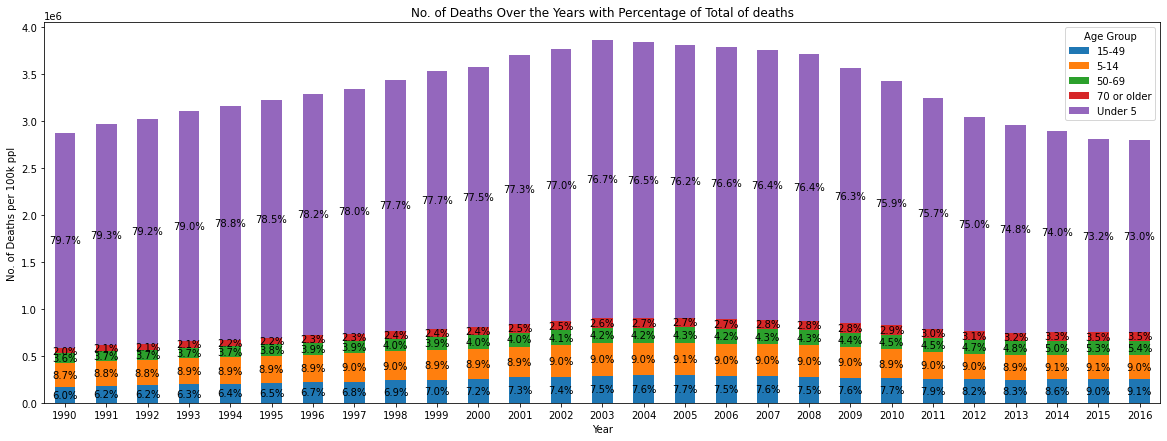

In [43]:


# group the malaria age dataframe by year and age group
year_age_group_df = malaira_age_df.groupby(["year", "age_group"]).agg({"deaths": "sum"}).reset_index()

# Pivot the dataframe
pivot_df = year_age_group_df.pivot("year", "age_group", "deaths")

# Plotting the stacked bar chart
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(20, 7))

# Calculate cumulative sums to place the percentage labels correctly
cumulative_sum = pivot_df.cumsum(axis=1)

# Total deaths for each year
totals = pivot_df.sum(axis=1)

# Add percentage labels
for i in range(len(pivot_df)):
    for j, col in enumerate(pivot_df.columns):
        # Getting the percentage value
        percent = pivot_df.iloc[i, j] / totals.iloc[i] * 100
        # Place the label
        ax.text(i, cumulative_sum.iloc[i, j] - pivot_df.iloc[i, j] / 2, f'{percent:.1f}%', 
                ha='center', va='center', color='black', fontsize=10)

# Set labels and title
plt.xlabel("Year")
plt.ylabel("No. of Deaths per 100k ppl")
plt.title("No. of Deaths Over the Years with Percentage of Total of deaths")
plt.xticks(rotation=0)
plt.legend(title="Age Group")

plt.show()

Visualisation Analysis: Based on age group, a large proportion of death is seen in the "under 5" age group with the average of 76% of the population total for each year . With the lowest based on percentage of total for each year is "70 or older" age group. This could indicate that malaria is most susceptible to the youngest age group and least susceptible to the oldest age group.

# Visualisation 3: Relationship between No. of deaths and No. of cases per 100k ppl

In [44]:
# mergring the malaria death and malaria incident dataframe on Entity, year and code
merge_df = pd.merge(malaria_death_df,malaria_inc_df, on =['Entity','Year','Code'], how='right')
merge_df

,Entity,Code,Year,Malaria Deaths per 100k ppl,Malaria Cases Per 1000 Pop at Risk
0,Afghanistan,AFG,2000,7.939949,107.100000
1,Afghanistan,AFG,2005,8.551042,46.500000
2,Afghanistan,AFG,2010,7.271249,23.900000
3,Afghanistan,AFG,2015,7.192283,23.600000
4,Algeria,DZA,2000,0.026530,0.037746
...,...,...,...,...,...
499,Zambia,ZMB,2015,30.273699,173.700000
500,Zimbabwe,ZWE,2000,6.485177,143.200000
501,Zimbabwe,ZWE,2005,10.963618,142.500000
502,Zimbabwe,ZWE,2010,10.344371,129.600000


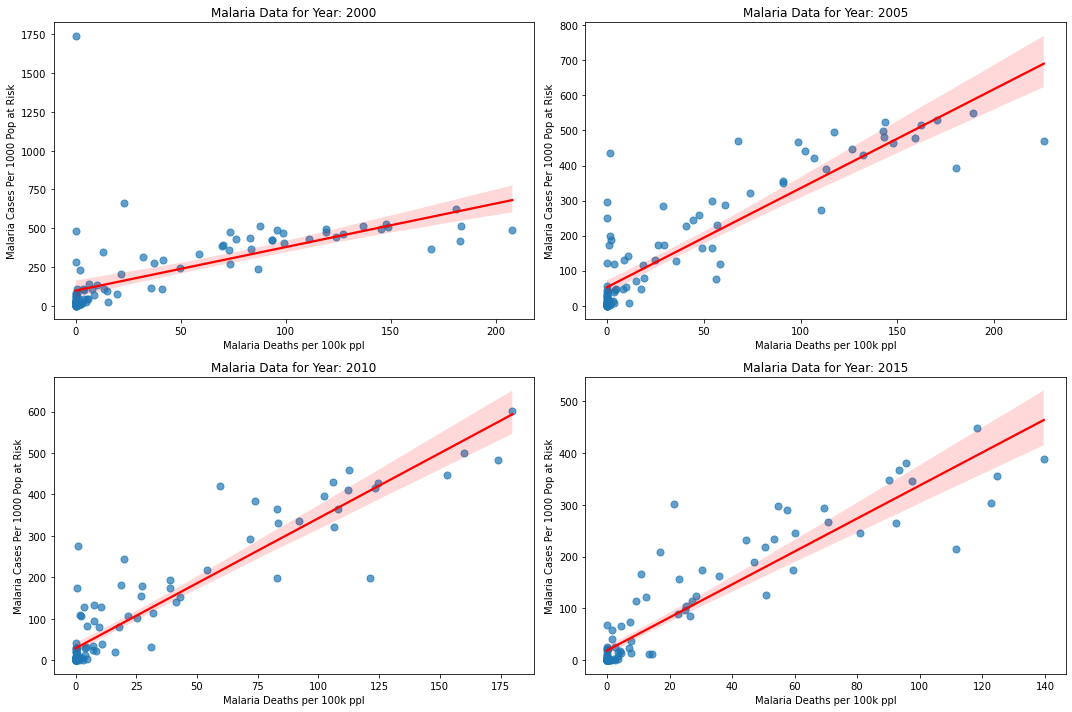

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


# obtain unique years
unique_years = merge_df['Year'].unique()

# get the number of rows and columns for the subplot
n_cols = 2
n_rows = (len(unique_years) + n_cols - 1) // n_cols

# figure with subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

ax = ax.flatten()

# Loop through each unique year and create plot
for i, year in enumerate(unique_years):
    df_year = merge_df[merge_df['Year'] == year]
    
    # Create the lmplot using the Axes in the grid
    sns.regplot(ax=ax[i], x="Malaria Deaths per 100k ppl", y="Malaria Cases Per 1000 Pop at Risk", data=df_year, 
                scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
    
    # Set the title
    ax[i].set_title(f"Malaria Data for Year: {year}")
    ax[i].set_xlabel("Malaria Deaths per 100k ppl")
    ax[i].set_ylabel("Malaria Cases Per 1000 Pop at Risk")


# Adjust layout
plt.tight_layout()

# Show the full figure with all subplots
plt.show()

Visualisation Analysis: All 4 years display a positive correlation between the number of deaths and the number of malaria cases. As the number of cases increases the number of death increases.Based on the year the year 2000 has the least steep slope wherases the other years have a relatively high steep slope. This shows that in year not 2000, there was relativey high rate in the increase of death with respective to increase in cases.